## Purpose: Model Comparison

Demonstration: 
    1. Parameter fit
    2. Use of Evidence

Author: Do Kester


import classes

In [1]:
import numpy as numpy
import math

from BayesicFitting import PolynomialModel
from BayesicFitting import Fitter
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
import matplotlib.pyplot as plt

define some constants

In [2]:
N = 21
sig = 0.1

make a 3-degree polynomial

In [3]:
x = numpy.linspace( -2.0, 3.0, N, dtype=float )
ym = 1.2 + 0.5 * x + 0.33 * x * x + 0.27 * x * x * x

y = ym + sig * numpy.random.randn( N )


Fit polynomial models of increasing degree. Calculate the evidence to see which one is the best model.

Polynomial degree  0   blue
Fit params           3.277
    stdev            0.812
    chisq          277.176
    evidence       -29.644
Polynomial degree  1   green
Fit params       [    2.215    2.123]
    stdev        [    0.409    0.257]
    chisq           60.175
    evidence       -25.521
Polynomial degree  2   red
Fit params       [    0.689    1.376    0.747]
    stdev        [    0.251    0.142    0.084]
    chisq           11.261
    evidence       -21.599
Polynomial degree  3   mint
Fit params       [    1.212    0.467    0.341    0.270]
    stdev        [    0.032    0.029    0.014    0.007]
    chisq            0.135
    evidence        -8.378
Polynomial degree  4   magenta
Fit params       [    1.203    0.448    0.357    0.277   -0.003]
    stdev        [    0.035    0.042    0.029    0.014    0.006]
    chisq            0.132
    evidence       -12.460
Polynomial degree  5   yellow
Fit params       [    1.237    0.407    0.282    0.315    0.015   -0.007]
    stdev        

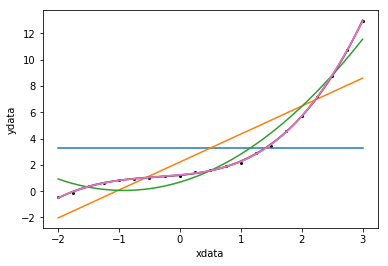

In [4]:
plotFit( x, y, show=False )
yy = numpy.zeros( 7, dtype=float )
xi = numpy.linspace( -2.0, 3.0, 201, dtype=float )
col = ["blue", "green", "red", "mint", "magenta", "yellow", "black"]
for deg in range( 7 ) :
    poly = PolynomialModel( deg )
    np = poly.getNumberOfParameters()
    fitter = Fitter( x, poly )
    param = fitter.fit( y )
    plt.plot( xi, poly( xi ) )

    chisq = fitter.chisq
    stdev = fitter.stdevs
    logpr = fitter.getEvidence( limits=[-100,100], noiseLimits=[0.01,10] )
    print( "Polynomial degree  %d  " % (np-1), col[deg] )
    print( "Fit params      ", fmt( param, max=None ) )
    print( "    stdev       ", fmt( stdev, max=None ) ) 
    print( "    chisq       ", fmt( chisq ) )
    print( "    evidence    ", fmt( logpr ) )
    yy[deg] = logpr
plt.show()

Plot the evidence as function of the polynomial degree.

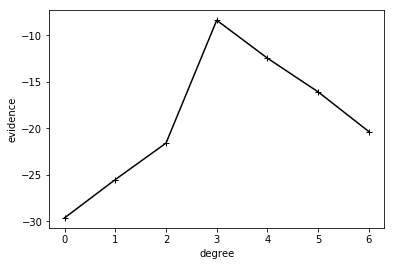

In [5]:
plt.plot( yy, 'k-+' )
plt.xlabel( "degree" )
plt.ylabel( "evidence" )
plt.show()